In [0]:
import numpy as np

class Perceptron(object):
  """
  퍼셉트론 분류기

  매개변수
  ------------
  eta : float
    학습률(0.0 과 1.0 사이)
  n_iter : int
    훈련 데이터의 반복 횟수
  random_state : int
    가중치 무작위 쵝화를 위한 난수 생성기 시드

  속성
  -------------
  w_ : 1d-array
    학습된 가중치
  errors_ : list
    에포크마다 누적된 분류 오류
  """

  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    """훈련 데이터 학습

    매개변수
    ------------
    X : {array-like}, shape=[n_samples, n_features]
      n개의 샘플과 n개의 특성으로 이루어진 훈련 데이터
    y : array-like, shape = [n_samples]
      타겟 값

    return value
    ------------
    self: obejct
    """

    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    self.errors_ = []

    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X, y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      
      self.errors_.append(errors)
    return self

  #최종 입력 계산
  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)

In [0]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/''machine-learning-databases/iris/iris.data', header=None)

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# select setosa & versicolor 
y = df.iloc[0:100, 4].values
print('1: ', y[:5])
print('2: ', y[50:55])

y = np.where(y == 'Iris-setosa', -1, 1)
print('3: ', y[:5])
print('4: ', y[50:55])


1:  ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
2:  ['Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor']
3:  [-1 -1 -1 -1 -1]
4:  [1 1 1 1 1]


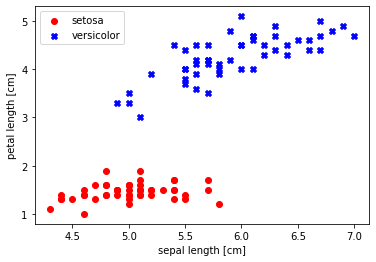

In [4]:
X = df.iloc[0:100, [0, 2]].values

# make scatter
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='X', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

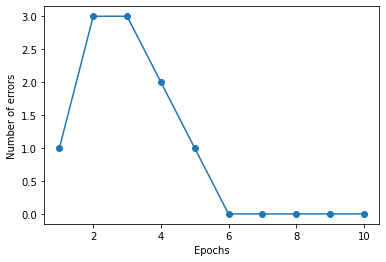

In [17]:

ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')

plt.show()

In [0]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
  # setting
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # draw decision_regions
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1

  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)

  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())


  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha =0.8,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolor='black')
    


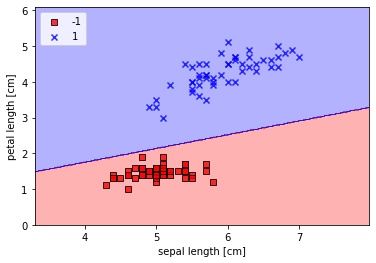

In [20]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()